### This jupyter notebook is to test the yahoo finance

In [166]:
import yfinance as yf
import pandas as pd
import numpy as np
import re

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import set_style

## import model objects
from sklearn.model_selection import train_test_split
import yfinance as yf
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

In [167]:
df= pd.read_csv("dataset_reg.csv")

In [168]:
# Add date as a column
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [169]:
df.head()

,Date,CADUSD=X_Open,CADUSD=X_Close,CADUSD=X_High,CADUSD=X_Low,CADUSD=X_Volume,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,...,F_change_in_price,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_Bollinger_Lower
0,2019-12-11 00:00:00+00:00,0.755744,0.755801,0.757627,0.755338,0.0,0.000348,0.000348,0.00000,0.000829,...,0.040000,67.317019,91.666667,-8.333333,0.028891,0.019558,2.474683,9.512433e+05,9.175514,8.713486
1,2019-12-12 00:00:00+00:00,0.759169,0.759146,0.759878,0.758058,0.0,0.003345,0.003345,0.00000,0.001068,...,0.210000,79.449205,93.220336,-6.779664,0.047109,0.025120,3.555552,2.066731e+06,9.246596,8.693404
2,2019-12-13 00:00:00+00:00,0.760323,0.760300,0.760341,0.757363,0.0,0.001154,0.001154,0.00000,0.001054,...,-0.090000,67.127048,72.881227,-27.118773,0.054615,0.031063,2.441724,1.725517e+06,9.278143,8.705857
3,2019-12-16 00:00:00+00:00,0.758426,0.758530,0.762602,0.758426,0.0,-0.001770,0.000000,0.00177,0.001054,...,0.160001,75.061187,100.000000,-0.000000,0.070659,0.039029,3.186813,2.459434e+06,9.349882,8.678118
4,2019-12-17 00:00:00+00:00,0.759728,0.759705,0.760688,0.758443,0.0,0.001175,0.001175,0.00000,0.001137,...,0.000000,75.061187,96.721391,-3.278609,0.082287,0.047722,3.642383,2.459434e+06,9.409738,8.662262


In [170]:
df.dtypes

Date                 datetime64[ns, UTC]
CADUSD=X_Open                    float64
CADUSD=X_Close                   float64
CADUSD=X_High                    float64
CADUSD=X_Low                     float64
                            ...         
F_MACD_EMA                       float64
F_ROC                            float64
F_PVT                            float64
F_Bollinger_Upper                float64
F_Bollinger_Lower                float64
Length: 152, dtype: object

In [171]:
df.describe()

,CADUSD=X_Open,CADUSD=X_Close,CADUSD=X_High,CADUSD=X_Low,CADUSD=X_Volume,CADUSD=X_Change,CADUSD=X_Gain,CADUSD=X_Loss,CADUSD=X_Avg_Gain,CADUSD=X_Avg_Loss,...,F_change_in_price,F_RSI,F_k_percent,F_r_percent,F_MACD,F_MACD_EMA,F_ROC,F_PVT,F_Bollinger_Upper,F_Bollinger_Lower
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.0,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,...,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1.238000e+03,1238.000000,1238.000000
mean,0.758334,0.758337,0.760431,0.756077,0.0,-0.000029,0.001220,0.001249,0.001219,0.001247,...,0.001745,50.633129,49.565013,-50.434987,0.010186,0.010269,0.706089,9.802740e+07,13.136769,10.882018
std,0.028471,0.028467,0.028532,0.028457,0.0,0.003274,0.001929,0.001987,0.000541,0.000646,...,0.343767,17.267973,30.459869,30.459869,0.421321,0.395372,10.287859,6.150850e+07,3.928438,3.128254
min,0.690026,0.689741,0.693371,0.681826,0.0,-0.012518,0.000000,0.000000,0.000048,0.000016,...,-2.510000,8.699243,0.000000,-100.000000,-1.071207,-0.953758,-40.504446,-8.469186e+07,5.333265,3.663582
25%,0.735792,0.735781,0.737564,0.734000,0.0,-0.001902,0.000000,0.000000,0.000858,0.000815,...,-0.150001,39.132810,22.524929,-77.475071,-0.207886,-0.203113,-5.120935,6.437151e+07,11.158548,9.205313
50%,0.751083,0.751033,0.753111,0.749058,0.0,-0.000020,0.000000,0.000020,0.001170,0.001164,...,0.000000,49.944425,48.661757,-51.338243,0.000046,0.008775,0.136480,1.154436e+08,13.085862,11.187365
75%,0.783627,0.783562,0.786046,0.780634,0.0,0.001852,0.001852,0.001902,0.001553,0.001510,...,0.160001,63.233904,78.045982,-21.954018,0.241311,0.230676,6.645445,1.355845e+08,14.864209,12.243559
max,0.830599,0.830703,0.832778,0.829009,0.0,0.012381,0.012381,0.012518,0.003353,0.004876,...,2.539999,92.692054,100.000000,-0.000000,1.382432,1.213766,38.490564,2.313853e+08,26.710337,19.065638


In [172]:
end_date = df['Date'].max()
start_date = end_date - pd.DateOffset(months=2)
df_last_2_months = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Step 2: Prepare features (X) and target (y)
X = df_last_2_months.drop(columns=['Date', 'F_Close_pred', 'F_Bollinger_Upper', 'F_Bollinger_Lower'])
y = df_last_2_months['F_Close_pred']

In [173]:
# Standardize and remove skewness
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
power_transformer = PowerTransformer()
X_transformed = power_transformer.fit_transform(X_scaled)

In [174]:
# Step 3: Split data - keep the last 1 week as an unseen test set
split_index = len(X_transformed) - 7
X_train_val, X_unseen_test = X_transformed[:split_index], X_transformed[split_index:]
y_train_val, y_unseen_test = y[:split_index], y[split_index:]

In [175]:
print(np.isnan(X_train_val).sum())  # Check for NaN in training data
print(np.isnan(X_unseen_test).sum())   # Check for NaN in test data

0
0


In [176]:
tscv = TimeSeriesSplit(n_splits=5)

In [177]:
tscv

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)

In [178]:
# Deftine the parameter grid for grid sed
param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 50, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}
svr = SVR()


grid_search = GridSearchCV(svr, param_grid, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_val, y_train_val)
best_params = grid_search.best_params_
# Train the model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(X_train_val, y_train_val)
## Make predictions: on the test set (i.e. last week)
predictions = best_svr_model.predict(X_unseen_test)
mse = mean_squared_error(y_unseen_test,predictions)

In [179]:
print("Best Hyperparameters",best_params)
print("Mean Squared Error",mse)

Best Hyperparameters {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}
Mean Squared Error 0.07369386491380125


In [180]:
# Chosen model
modelSVR = SVR(kernel='linear', C=1, epsilon=0.01)

In [181]:
# checking 
modelSVR.fit(X_train_val, y_train_val)
## Make predictions: on the test set (i.e. last week)
predictions = best_svr_model.predict(X_unseen_test)
mse = mean_squared_error(y_unseen_test,predictions)
print("Mean Squared Error",mse)

Mean Squared Error 0.07369386491380125


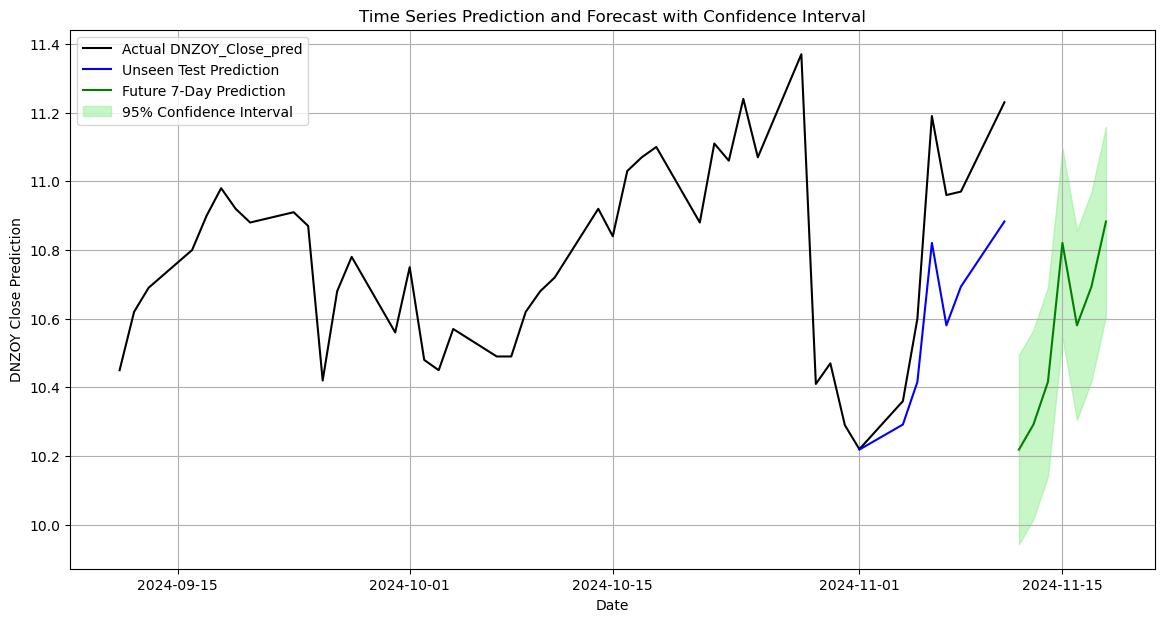

In [182]:
# Step 7: Forecast the next 7 days with a confidence interval
z = 7
future_7_days = X_transformed[-z:]  # Use the last week for forecasting
future_predictions = modelSVR.predict(future_7_days)
# Calculate confidence interval (simple approximation based on prediction standard deviation)
std_dev = np.std(predictions - y_unseen_test)
upper_bound = future_predictions + (1.96 * std_dev)
lower_bound = future_predictions - (1.96 * std_dev)

# # Plot the results
plt.figure(figsize=(14, 7))
# Actual data
plt.plot(df_last_2_months['Date'], y, label="Actual DNZOY_Close_pred", color='black')
# Predictions on unseen test
plt.plot(df_last_2_months['Date'].iloc[-z:], predictions, label="Unseen Test Prediction", color='blue')
# Future forecast
future_dates = pd.date_range(df_last_2_months['Date'].iloc[-1] + pd.Timedelta(days=1), periods=z)
plt.plot(future_dates, future_predictions, label="Future 7-Day Prediction", color='green')
plt.fill_between(future_dates, lower_bound, upper_bound, color='lightgreen', alpha=0.5, label="95% Confidence Interval")

plt.xlabel("Date")
plt.ylabel("DNZOY Close Prediction")
plt.title("Time Series Prediction and Forecast with Confidence Interval")
plt.legend()
plt.grid(True)
plt.show()

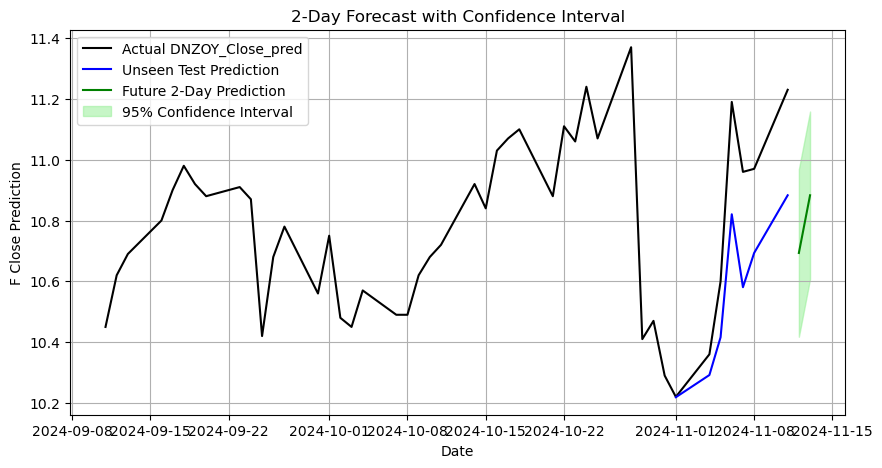

In [183]:
# Forecasting and plotting the next 2 days
z = 2  # Forecast horizon (2 days)
future_2_days = X_transformed[-z:]  # Use the last 2 entries for forecasting
future_predictions = modelSVR.predict(future_2_days)

# Calculate confidence interval
std_dev = np.std(predictions - y_unseen_test)  # Standard deviation of the test residuals
upper_bound = future_predictions + (1.96 * std_dev)
lower_bound = future_predictions - (1.96 * std_dev)

# Plotting
plt.figure(figsize=(10, 5))
# Actual data
plt.plot(df_last_2_months['Date'], y, label="Actual DNZOY_Close_pred", color='black')
# Predictions on unseen test
plt.plot(df_last_2_months['Date'].iloc[-len(predictions):], predictions, label="Unseen Test Prediction", color='blue')
# Future forecast for 2 days
future_dates = pd.date_range(df_last_2_months['Date'].iloc[-1] + pd.Timedelta(days=1), periods=z)
plt.plot(future_dates, future_predictions, label="Future 2-Day Prediction", color='green')
plt.fill_between(future_dates, lower_bound, upper_bound, color='lightgreen', alpha=0.5, label="95% Confidence Interval")

plt.xlabel("Date")
plt.ylabel("F Close Prediction")
plt.title("2-Day Forecast with Confidence Interval")
plt.legend()
plt.grid(True)
plt.show()


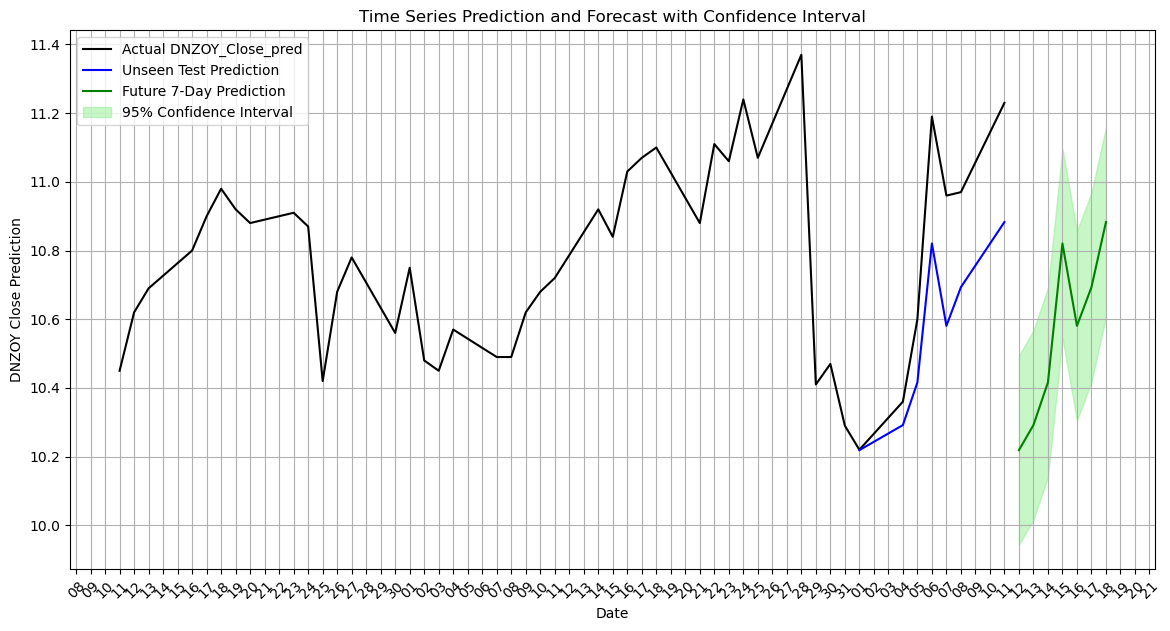

In [184]:
import matplotlib.dates as mdates

# Step 7: Forecast the next 7 days with a confidence interval
z = 7
future_7_days = X_transformed[-z:]  # Use the last week for forecasting
future_predictions = modelSVR.predict(future_7_days)

# Calculate confidence interval (simple approximation based on prediction standard deviation)
std_dev = np.std(predictions - y_unseen_test)
upper_bound = future_predictions + (1.96 * std_dev)
lower_bound = future_predictions - (1.96 * std_dev)

# Plot the results
plt.figure(figsize=(14, 7))

# Actual data
plt.plot(df_last_2_months['Date'], y, label="Actual DNZOY_Close_pred", color='black')

# Predictions on unseen test
plt.plot(df_last_2_months['Date'].iloc[-z:], predictions, label="Unseen Test Prediction", color='blue')

# Future forecast for the next 7 days
future_dates = pd.date_range(df_last_2_months['Date'].iloc[-1] + pd.Timedelta(days=1), periods=z)
plt.plot(future_dates, future_predictions, label="Future 7-Day Prediction", color='green')
plt.fill_between(future_dates, lower_bound, upper_bound, color='lightgreen', alpha=0.5, label="95% Confidence Interval")

# Plot styling
plt.xlabel("Date")
plt.ylabel("DNZOY Close Prediction")
plt.title("Time Series Prediction and Forecast with Confidence Interval")
plt.legend()
plt.grid(True)

# Set grid for each day and format date to show only the day
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Major grid lines for each day
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))  # Format x-axis labels by day only
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.show()


## Some commodity tickers

- gold: SB=F
- Crude Oil: CL=F
- Silver: XAG=